In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('TLKM.JK.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-28,3370.0,3460.0,3280.0,3430.0,3150.129150,178138100
1,2020-12-29,3500.0,3530.0,3400.0,3420.0,3140.945068,184525500
2,2020-12-30,3420.0,3420.0,3310.0,3310.0,3039.920410,150844500
3,2021-01-04,3320.0,3500.0,3310.0,3490.0,3205.233154,165339800
4,2021-01-05,3480.0,3480.0,3420.0,3470.0,3186.865234,157800700


In [5]:
data.shape

(493, 7)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,493.0,3.877667e+03,4.885536e+02,3.030000e+03,3.400000e+03,3.980000e+03,4300.0,4850.0
High,493.0,3.921156e+03,4.912326e+02,3.060000e+03,3.430000e+03,4.040000e+03,4350.0,4850.0
Low,493.0,3.832211e+03,4.826171e+02,3.000000e+03,3.360000e+03,3.930000e+03,4250.0,4720.0
Close,493.0,3.877363e+03,4.882772e+02,3.010000e+03,3.390000e+03,3.990000e+03,4300.0,4770.0
Adj Close,493.0,3.750470e+03,5.463914e+02,2.856240e+03,3.196049e+03,3.926386e+03,4210.0,4750.0
Volume,493.0,1.141068e+08,6.699120e+07,1.921670e+07,6.986630e+07,9.732050e+07,142204500.0,585687400.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       493 non-null    object 
 1   Open       493 non-null    float64
 2   High       493 non-null    float64
 3   Low        493 non-null    float64
 4   Close      493 non-null    float64
 5   Adj Close  493 non-null    float64
 6   Volume     493 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.1+ KB


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data = data.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [11]:
data.head()

,Date,Close
0,2020-12-28,3430.0
1,2020-12-29,3420.0
2,2020-12-30,3310.0
3,2021-01-04,3490.0
4,2021-01-05,3470.0


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace = True)

In [13]:
data.index

DatetimeIndex(['2020-12-28', '2020-12-29', '2020-12-30', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12',
               ...
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19',
               '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23',
               '2022-12-26', '2022-12-27'],
              dtype='datetime64[ns]', name='Date', length=493, freq=None)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2020-12-28 to 2022-12-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   493 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


In [15]:
data.head()

,Close
Date,
2020-12-28,3430.0
2020-12-29,3420.0
2020-12-30,3310.0
2021-01-04,3490.0
2021-01-05,3470.0


### For Time Series

In [16]:
ts = data['Close']
ts.head(10)

Date
2020-12-28    3430.0
2020-12-29    3420.0
2020-12-30    3310.0
2021-01-04    3490.0
2021-01-05    3470.0
2021-01-06    3370.0
2021-01-07    3390.0
2021-01-08    3570.0
2021-01-11    3600.0
2021-01-12    3510.0
Name: Close, dtype: float64

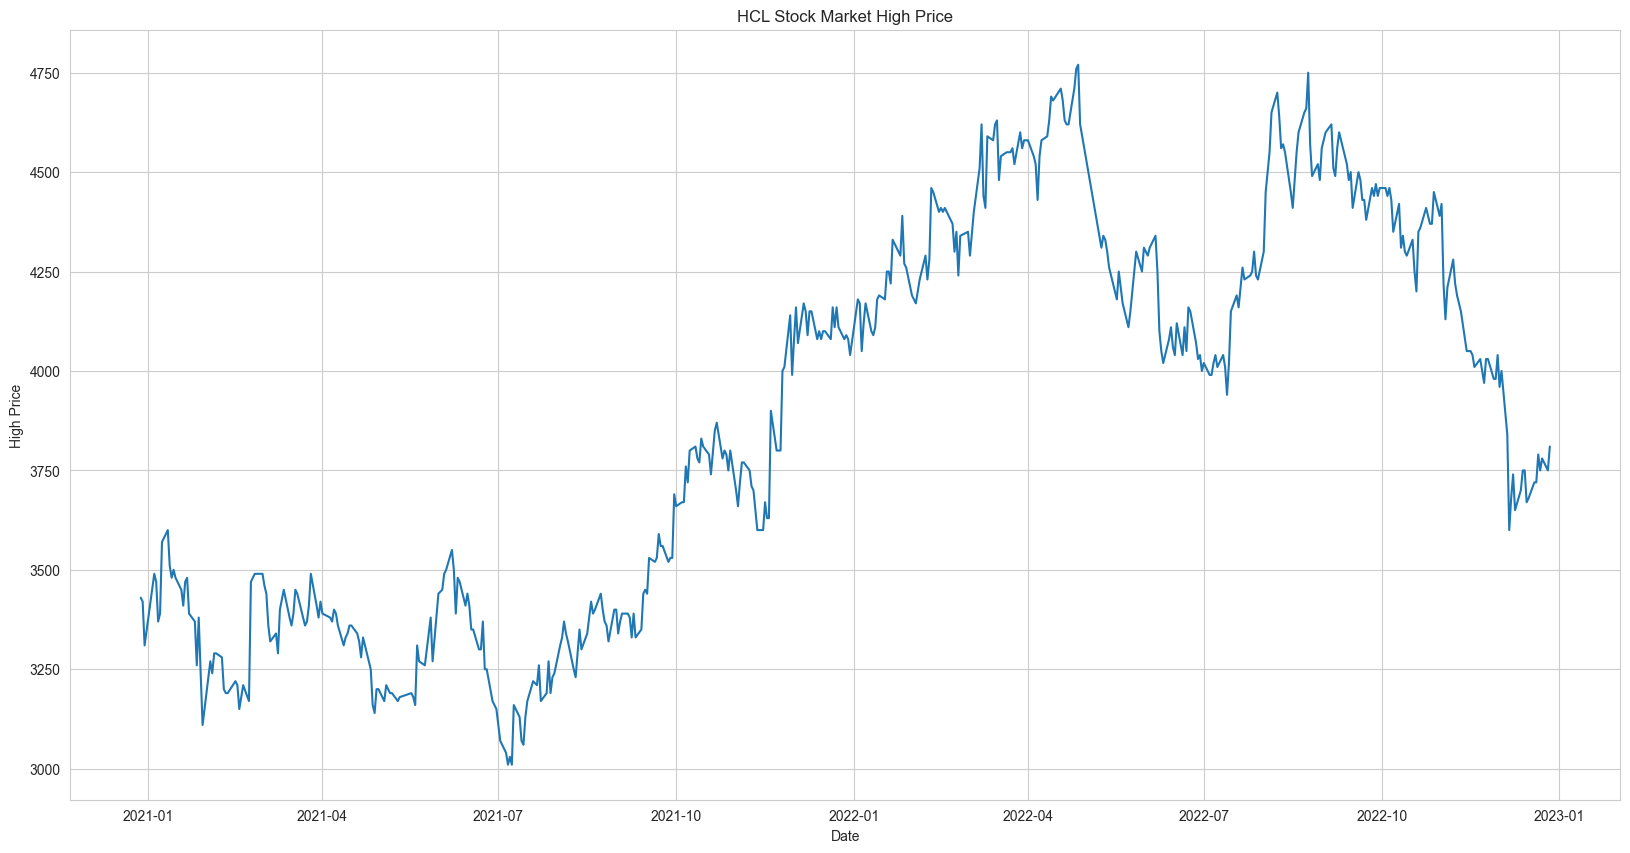

In [18]:
plt.figure(figsize=(20,10))

sns.set_style('whitegrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('HCL Stock Market High Price')

plt.plot(data['Close'])

In [19]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

## Uji Stasioneritas

In [20]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

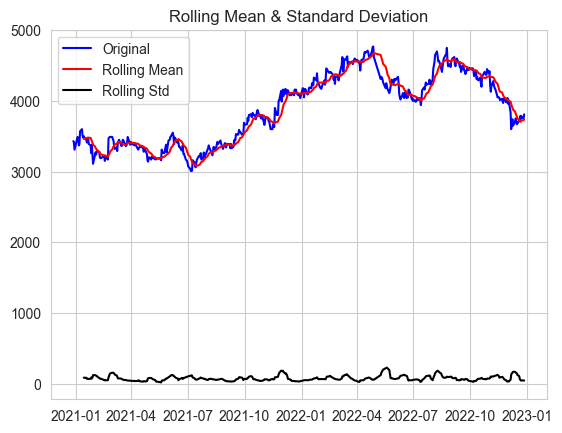

Results of Dickey-Fuller Test:
Test Statistic                  -1.427455
p-value                          0.569045
#Lags Used                       2.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64


In [21]:
test_stationarity(ts)

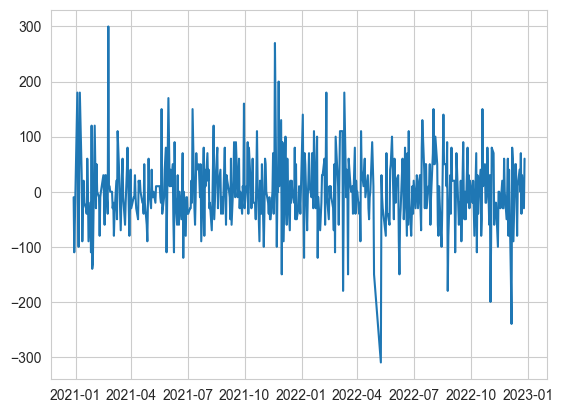

In [22]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

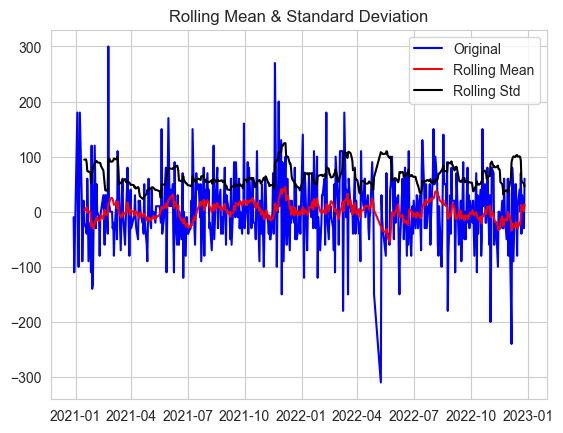

Results of Dickey-Fuller Test:
Test Statistic                 -19.062736
p-value                          0.000000
#Lags Used                       1.000000
Number of Observations Used    490.000000
Critical Value (1%)             -3.443766
Critical Value (5%)             -2.867457
Critical Value (10%)            -2.569921
dtype: float64


In [23]:
test_stationarity(ts_diff_1)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


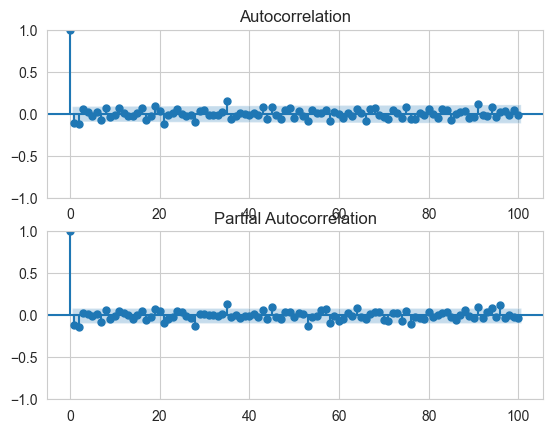

In [24]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=100)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=100)
plt.show()

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [31]:
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=495.699
ARIMA(0, 0, 1) RMSE=273.463
ARIMA(0, 1, 0) RMSE=65.543
ARIMA(0, 1, 1) RMSE=66.423
ARIMA(1, 0, 0) RMSE=65.385
ARIMA(1, 0, 1) RMSE=66.255
ARIMA(1, 1, 0) RMSE=66.184
ARIMA(1, 1, 1) RMSE=66.117
Best ARIMA(1, 0, 0) RMSE=65.385


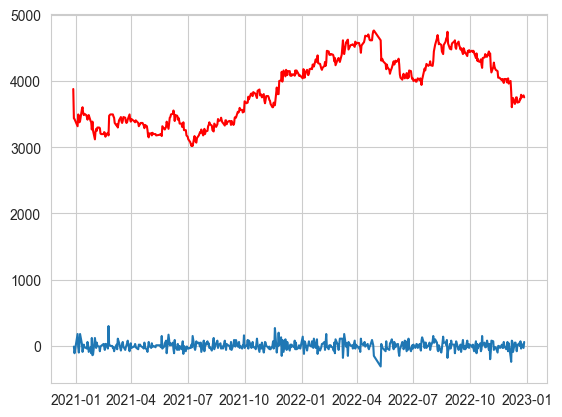

In [33]:
model_ARIMA = ARIMA(ts, order=(1,0,0))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red') 

In [35]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  493
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2769.694
Date:                Wed, 28 Dec 2022   AIC                           5545.389
Time:                        11:09:45   BIC                           5557.991
Sample:                             0   HQIC                          5550.337
                                - 493                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3877.3589    252.728     15.342      0.000    3382.021    4372.697
ar.L1          0.9898      0.006    155.316      0.000       0.977       1.002
sigma2      4404.2278    209.804     20.992      0.000    3993.019    4815.437
===================================================================================
Ljung-Box (L1) (Q):                   5.79   Jarque-Bera (JB):                98.93
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.17
Prob(H) (two-sided):                  0.23   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict

In [37]:
predict_dif = results_ARIMA.predict(start=494,end=514)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

494      7621.373309
495     15244.796047
496     26680.937403
497     41930.459714
498     60994.018526
499     83872.262670
500    110565.834329
501    141075.369105
502    175401.496088
503    213544.837921
504    255506.010869
505    301285.624880
506    350884.283655
507    404302.584707
508    461541.119427
509    522600.473146
510    587481.225200
511    656183.948986
512    728709.212026
513    805057.576029
514    885229.596945
dtype: float64


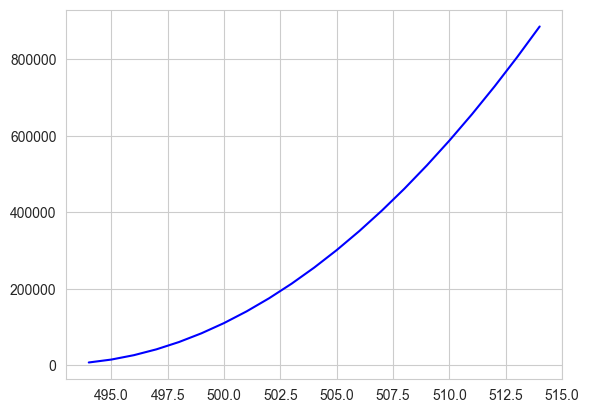

In [38]:
plt.plot(predict, color='blue')